# Final Submission

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tabulate import tabulate

## Base Data Cleaning

In [2]:
mat_df = pd.read_csv('./student-mat.csv', sep=';')
por_df = pd.read_csv('./student-por.csv', sep=';')

por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
mat_df.insert(1, 'class', 'mat')
por_df.insert(1, 'class', 'por')
df = pd.concat([mat_df, por_df], axis=0)

In [4]:
df.drop(['G1', 'G2'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   class       1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery  

## 2.1 Data Quality Reports

In [5]:
cat_features = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'schoolsup' ,'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cont_features = ['age', 'absences', 'G3']

cat_df = df[cat_features]
cont_df = df[cont_features]

In [6]:
# Cat. Feature Data Quality Report
# Feature feature
cat_dq_report = pd.DataFrame(cat_df.columns.values)
cat_dq_report.columns = ['Feature']
cat_dq_report = cat_dq_report.reindex(columns = cat_dq_report.columns.tolist() + 
                                      ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Count feature
cat_dq_report['Count'] = cat_df.shape[0]

for i, feature in enumerate(cat_dq_report['Feature']):
    cat_dq_report.iloc[i:i+1, 2] = cat_df[feature].isna().sum() / cat_df.shape[0] # Miss %
    
    mode_info_df =  cat_df[feature].value_counts().reset_index()
    
    cat_dq_report.iloc[i:i+1, 3] = mode_info_df['index'].shape[0] # Card. feature
    cat_dq_report.iloc[i:i+1, 4] = mode_info_df.at[0, 'index'] # Mode
    cat_dq_report.iloc[i:i+1, 5] = mode_info_df.at[0, feature] # Mode Freq.
    cat_dq_report.iloc[i:i+1, 7] = mode_info_df.at[1, 'index'] # 2nd Mode
    cat_dq_report.iloc[i:i+1, 8] = mode_info_df.at[1, feature] # 2nd Mode Freq.

# Deriving mode % for first and second mode
cat_dq_report['Mode %'] = cat_dq_report['Mode Freq.'] / cat_dq_report['Count'] * 100
cat_dq_report['2nd Mode %'] = cat_dq_report['2nd Mode Freq.'] / cat_dq_report['Count'] * 100

cat_dq_report.head()

,Feature,Count,Miss %,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,school,1044,0.0,2.0,GP,772.0,73.946360,MS,272.0,26.053640
1,class,1044,0.0,2.0,por,649.0,62.164751,mat,395.0,37.835249
2,sex,1044,0.0,2.0,F,591.0,56.609195,M,453.0,43.390805
3,address,1044,0.0,2.0,U,759.0,72.701149,R,285.0,27.298851
4,famsize,1044,0.0,2.0,GT3,738.0,70.689655,LE3,306.0,29.310345


In [7]:
# Cont. Feature Data Quality Report
# Feature feature
cont_dq_report = pd.DataFrame(cont_df.columns.values)
cont_dq_report.columns = ['Feature']

cont_desc = cont_df[cont_dq_report['Feature']].describe()

# Turning rows of cont_desc into columns of our data quality report
for i, row in enumerate(list(cont_desc.index.values)):
    cont_dq_report[row] = cont_desc[i:i+1][:].T.values

cont_dq_report['% Miss.'] = 0
for i, feature in enumerate(cont_dq_report['Feature']):
    cont_dq_report.iloc[i:i+1, 9] = cont_df[feature].isna().sum() / cont_df.shape[0] # Miss %

# Cardinality feature
cont_dq_report['Card.'] = df[cont_dq_report['Feature']].nunique().values

cont_dq_report = cont_dq_report[['Feature', 'count', '% Miss.', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']]
cont_dq_report.rename({'count': 'Count', 'min': 'Min.', '25%': '1st Qrt.', 'mean': 'Mean', '50%': 'Median', '75%': '3rd Qrt.', 'max': 'Max.', 'std': 'Std. Dev.'}, axis=1, inplace=True)

cont_dq_report.head()

,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,1044.0,0,8,15.0,16.0,16.726054,17.0,18.0,22.0,1.239975
1,absences,1044.0,0,35,0.0,0.0,4.434866,2.0,6.0,75.0,6.210017
2,G3,1044.0,0,19,0.0,10.0,11.341954,11.0,14.0,20.0,3.864796


## 2.1.2 Data Visualizations 

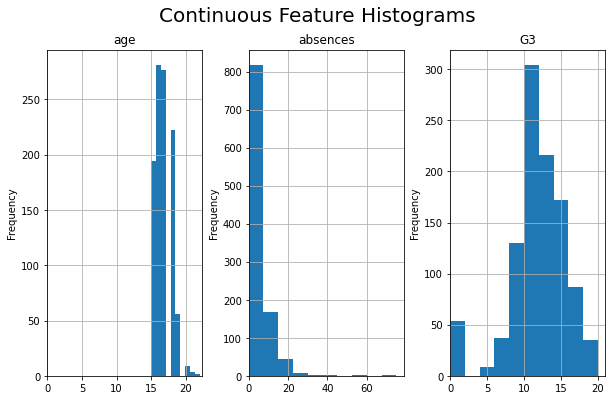

In [8]:
# Continuous Feature Histograms
fig, axes = plt.subplots(1, 3, figsize=(10,6))

fig.suptitle("Continuous Feature Histograms", fontsize=20)
for i, feature in enumerate(cont_features):
    cont_df.hist(feature, ax=axes[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(xmin=0)

plt.show()

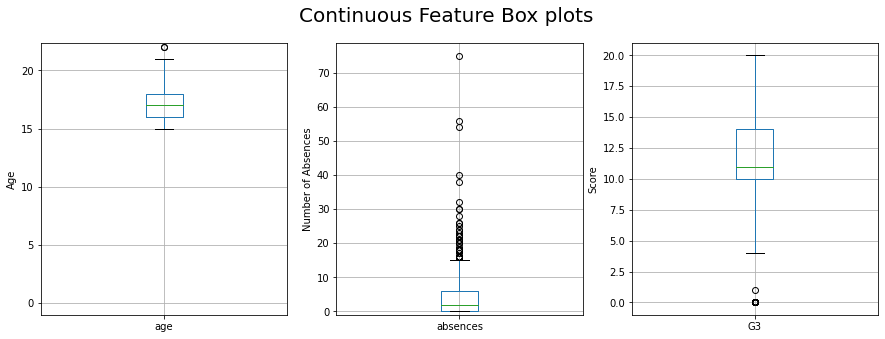

In [9]:
# Continuous Feature Box Plots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle('Continuous Feature Box plots', fontsize=20)

for i, feature in enumerate(cont_features):
    cont_df.boxplot(feature, ax=axes[i])
    axes[i].set_ylim(ymin=-1)

axes[0].set_ylabel('Age')
axes[1].set_ylabel('Number of Absences')
axes[2].set_ylabel('Score')

plt.show()

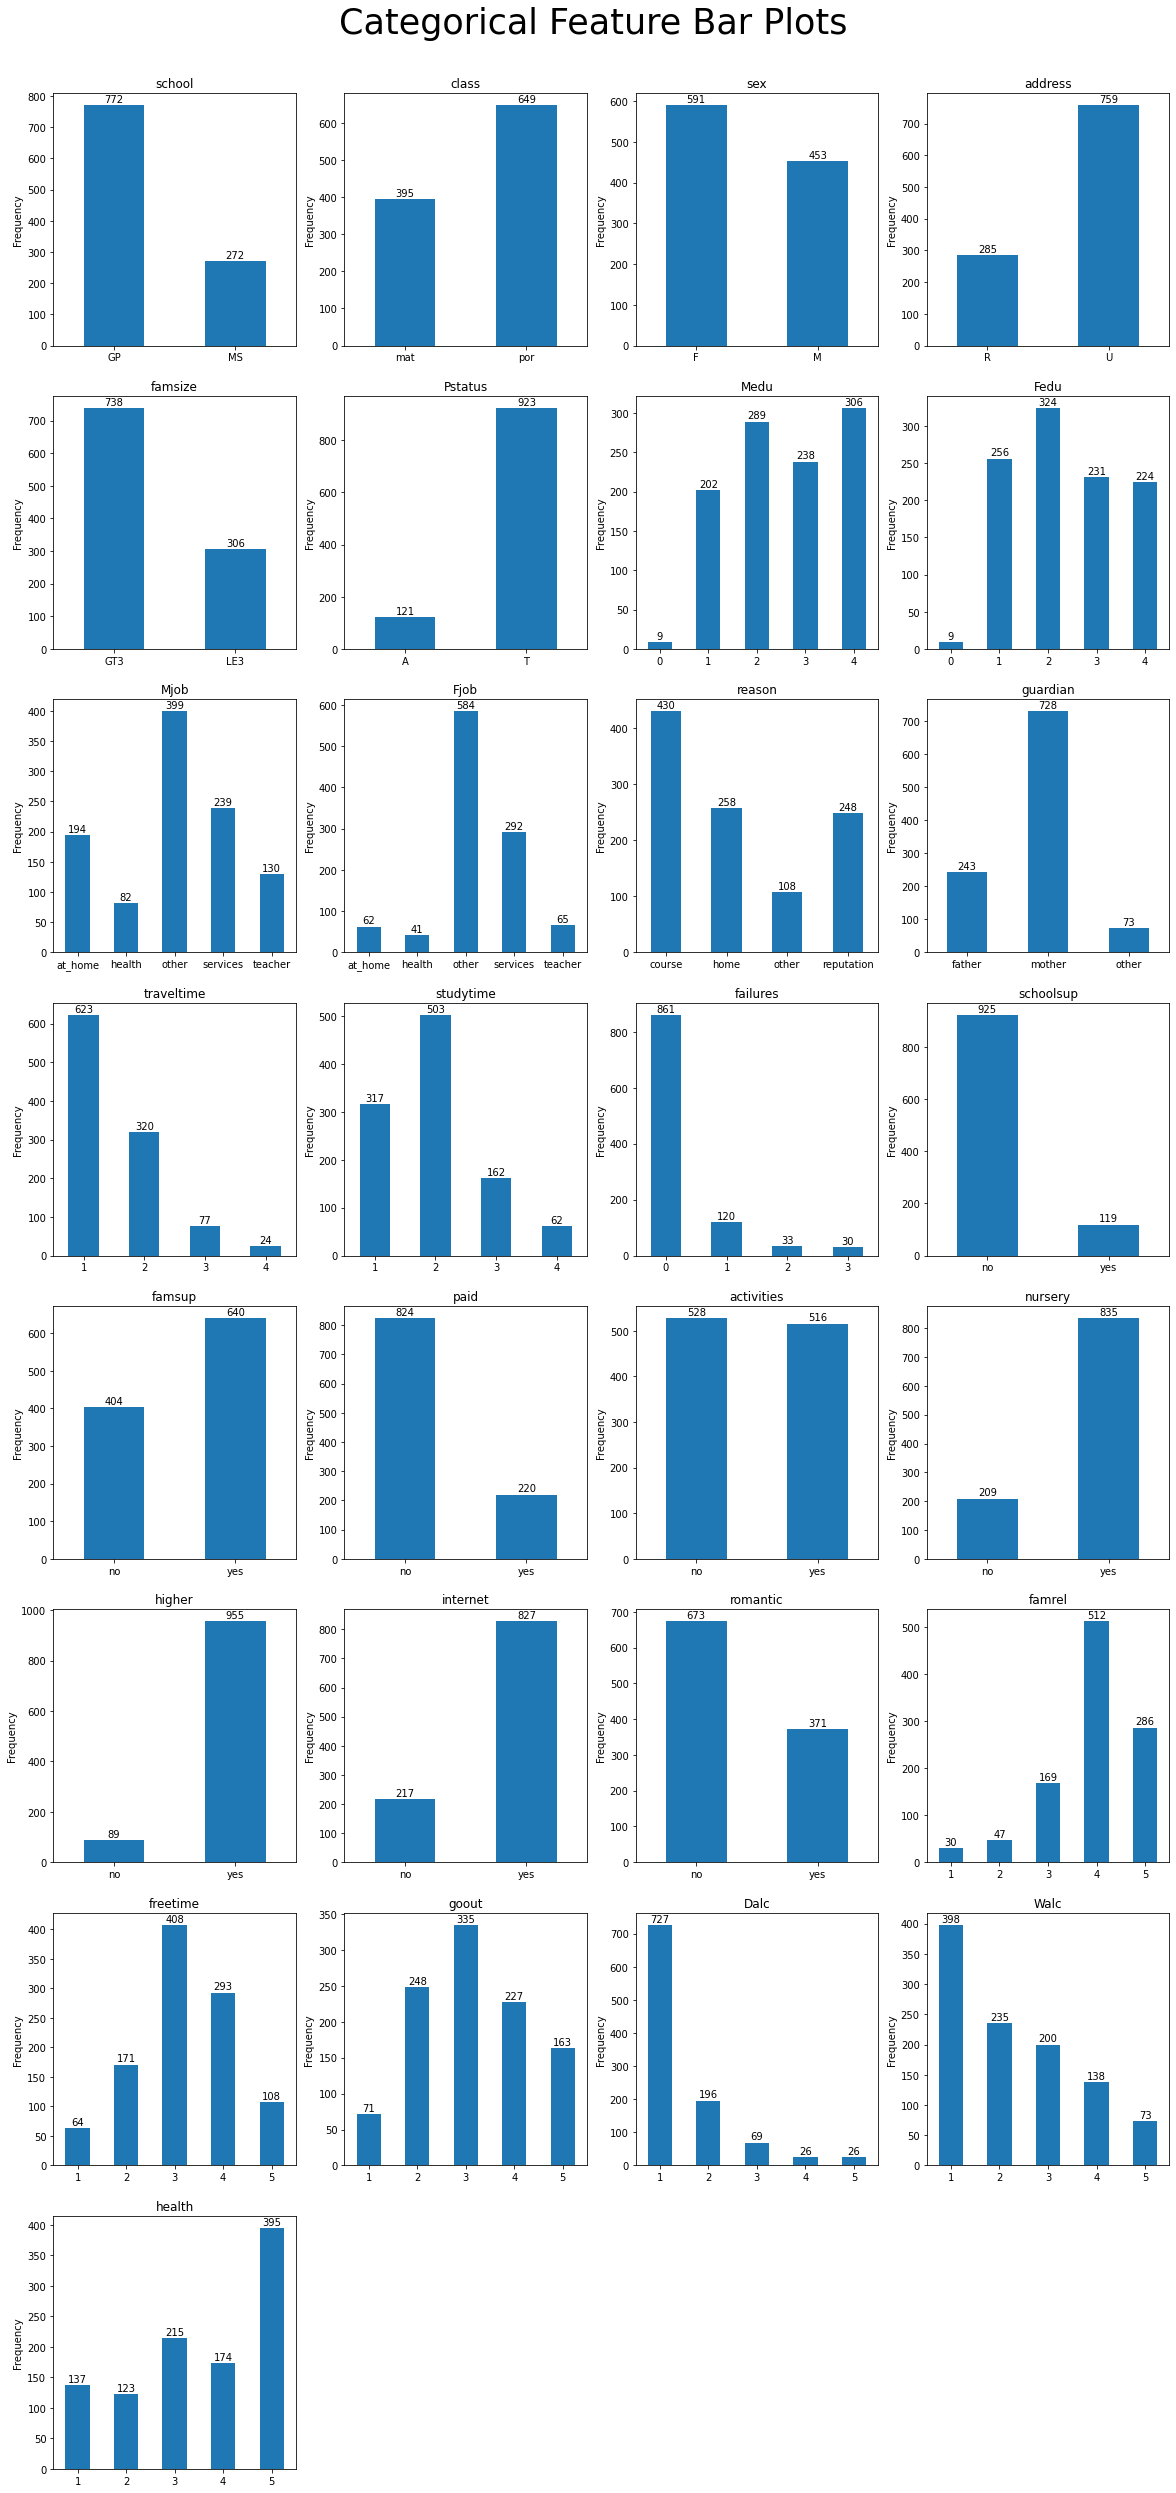

In [10]:
# Categorical Feature Bar Plots
fig = plt.figure(figsize=(20, 40))

fig.suptitle("Categorical Feature Bar Plots", fontsize=35)
# Adjusting white space under title
fig.tight_layout()
fig.subplots_adjust(top=0.95)

for i in range(1,30):
    ax = fig.add_subplot(8, 4, i)
    feature = cat_features[i-1]
    plt.title(feature)
    ax = cat_df[feature].value_counts().sort_index().plot(kind='bar') # sort_index so that ordinal values are in order
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')
    # Adds frequencies above each bar
    for bar in ax.patches:
        # Get X and Y placement of label of bar
        y_val = bar.get_height()
        x_val = bar.get_x() + bar.get_width() / 2
        label = "{:.0f}".format(y_val)

        # Create annotation
        ax.annotate(label, (x_val, y_val), 
            xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')

plt.show()

## One-Hot Encoded Data

In [11]:
# one-hot encoded data: gender, ethnicity, education, lunch

one_hot_encoded_data = pd.get_dummies(df, columns = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'schoolsup','famsup'])
# print(tabulate(one_hot_encoded_data, headers = "keys", tablefmt='fancy_grid'))

print(type(one_hot_encoded_data))


<class 'pandas.core.frame.DataFrame'>


In [12]:
cat_features = set(one_hot_encoded_data.columns.to_list()).difference(set(cont_features))
cat_features = list(cat_features)


### Missing Values and Outliers

In [13]:
#Divide into a cont_dateframe and cat_dataframe

df2 = pd.DataFrame()
df3 = pd.DataFrame()
cont_features = ["age", "absences"]
df2 = one_hot_encoded_data[cont_features]

def find_outliers_IQR(df2):
    q1=df2.quantile(0.25)
    q3=df2.quantile(0.75)
    

    IQR=q3-q1
    
    outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]
    

    return outliers

for f in cont_features: 

    outliers = find_outliers_IQR(df2[f])
    print('****************************', f, '****************************')
    print("number of outliers: \n" + str(len(outliers)))

    print("max outlier value: \n" + str(outliers.max()))

    print("min outlier value: \n" + str(outliers.min()))


for f in cont_features:
    irq_15 = 1.5 * (one_hot_encoded_data[f].quantile(0.75) - one_hot_encoded_data[f].quantile(0.25))
    q1 = one_hot_encoded_data[f].quantile(0.25)
    q2 = one_hot_encoded_data[f].quantile(0.75)
    min_val = q1 - irq_15
    max_val = q2 + irq_15

    one_hot_encoded_data.loc[one_hot_encoded_data[f] < min_val, f] = min_val
    one_hot_encoded_data.loc[one_hot_encoded_data[f] > max_val, f] = max_val
    
    print(f, 'min: ', one_hot_encoded_data[f].min(), 'max: ', one_hot_encoded_data[f].max())

**************************** age ****************************
number of outliers: 
2
max outlier value: 
22
min outlier value: 
22
**************************** absences ****************************
number of outliers: 
54
max outlier value: 
75
min outlier value: 
16
age min:  15 max:  21
absences min:  0 max:  15


### Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

for f in cont_features:
    scaler = MinMaxScaler()
    one_hot_encoded_data[f] = scaler.fit_transform(one_hot_encoded_data[f].values.reshape(-1, 1))
    print(f, 'min: ', one_hot_encoded_data[f].min(), 'max: ', one_hot_encoded_data[f].max())


age min:  0.0 max:  1.0
absences min:  0.0 max:  1.0


In [15]:
for c in one_hot_encoded_data.columns:
    print(c, one_hot_encoded_data[c].unique())

age [0.5        0.33333333 0.         0.16666667 0.66666667 1.
 0.83333333]
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [0.4        0.26666667 0.66666667 0.13333333 0.         1.
 0.93333333 0.46666667 0.53333333 0.8        0.33333333 0.86666667
 0.2        0.06666667 0.6        0.73333333]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4  1]
school_GP [1 0]
school_MS [0 1]
class_mat [1 0]
class_por [0 1]
sex_F [1 0]
sex_M [0 1]
address_R [0 1]
address_U [1 0]
famsize_GT3 [1 0]
famsize_LE3 [0 1]
Pstatus_A [1 0]
Pstatus_T [0 1]
Mjob_at_home [1 0]
Mjob_health [0 1]
Mjob_other [0 1]
Mjob_services [0 1]
Mjob_teacher [0 1]
Fjob_at_home [0 1]
Fjob_health [0 1]
Fjob_other [0 1]
Fjob_services [0 1]
Fjob_teacher [1 0]
reason_course [1 0]
reason_home [0 1]
reason_other [0 1]
reason_reputation [0 1]
guardian_father [0 1]

### Selecting Features

In [16]:
corr_arr = one_hot_encoded_data.corr()

remove_vals = corr_arr["G3"].sort_values(ascending=False)
print(remove_vals)

G3                   1.000000
higher_yes           0.236578
Medu                 0.201472
class_por            0.187166
studytime            0.161629
Fedu                 0.159796
school_GP            0.127114
reason_reputation    0.121303
address_U            0.117696
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic_no          0.098363
Mjob_teacher         0.084521
schoolsup_no         0.079346
famsize_LE3          0.061209
famrel               0.054461
paid_no              0.049388
Mjob_services        0.045015
guardian_father      0.042778
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
sex_F                0.031472
Pstatus_A            0.030693
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
famsup_no           -0.013313
Fjob_at_home        -0.021194
Fjob_other          -0.023825
Pstatus_T           -0.030693
sex_M               -0.031472
activities

In [17]:
#print all values with less than +/- 0.1 correlation
remove_vals = remove_vals[remove_vals < 0.1]
remove_vals = remove_vals[remove_vals > -0.1]

keep_vals = set(one_hot_encoded_data.columns.to_list()).difference(set(remove_vals.index.to_list()))
keep_vals = list(keep_vals)

print("features removed:", len(remove_vals.index.to_list()))
print(remove_vals.index.to_list())

print("\n\nfeatures left:", len(one_hot_encoded_data.columns) - len(remove_vals))
print(keep_vals)

features removed: 36
['romantic_no', 'Mjob_teacher', 'schoolsup_no', 'famsize_LE3', 'famrel', 'paid_no', 'Mjob_services', 'guardian_father', 'Fjob_health', 'nursery_yes', 'activities_yes', 'sex_F', 'Pstatus_A', 'famsup_yes', 'guardian_mother', 'reason_home', 'famsup_no', 'Fjob_at_home', 'Fjob_other', 'Pstatus_T', 'sex_M', 'activities_no', 'absences', 'Fjob_services', 'nursery_no', 'reason_other', 'paid_yes', 'famsize_GT3', 'freetime', 'Mjob_other', 'schoolsup_yes', 'health', 'reason_course', 'guardian_other', 'goout', 'romantic_yes']


features left: 23
['Dalc', 'school_MS', 'class_por', 'G3', 'Mjob_health', 'Fedu', 'higher_no', 'address_R', 'Medu', 'traveltime', 'internet_no', 'age', 'studytime', 'Mjob_at_home', 'internet_yes', 'failures', 'address_U', 'Walc', 'school_GP', 'class_mat', 'higher_yes', 'reason_reputation', 'Fjob_teacher']


In [18]:
binary1 = pd.get_dummies(one_hot_encoded_data[keep_vals])
binary1.to_csv('final_data.csv')

display (binary1)


,Dalc,school_MS,class_por,G3,Mjob_health,Fedu,higher_no,address_R,Medu,traveltime,...,Mjob_at_home,internet_yes,failures,address_U,Walc,school_GP,class_mat,higher_yes,reason_reputation,Fjob_teacher
0,1,0,0,6,0,4,0,0,4,2,...,1,0,0,1,1,1,1,1,0,1
1,1,0,0,6,0,1,0,0,1,1,...,1,1,0,1,1,1,1,1,0,0
2,2,0,0,10,0,1,0,0,1,1,...,1,1,3,1,3,1,1,1,0,0
3,1,0,0,15,1,2,0,0,4,1,...,0,1,0,1,1,1,1,1,0,0
4,1,0,0,10,0,3,0,0,3,1,...,0,0,0,1,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,1,10,0,3,0,1,2,1,...,0,1,1,0,2,0,0,1,0,0
645,1,1,1,16,0,1,0,0,3,1,...,0,1,0,1,1,0,0,1,0,0
646,1,1,1,9,0,1,0,0,1,2,...,0,0,0,1,1,0,0,1,0,0
647,3,1,1,10,0,1,0,0,3,2,...,0,1,0,1,4,0,0,1,0,0


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Decision Tree Regressor

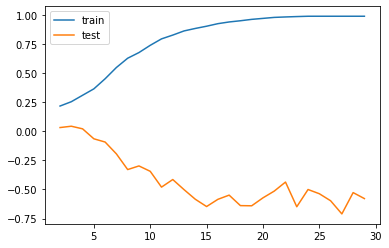

In [20]:
train_scores = []
test_scores = []
X = binary1.drop('G3', axis=1)
y = binary1['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r = range(2,30)
for i in r:
    desc_tree_reg = DecisionTreeRegressor(max_depth=i, criterion='squared_error')
    desc_tree_reg.fit(X_train, y_train)
    train_scores.append(desc_tree_reg.score(X_train, y_train))
    test_scores.append(desc_tree_reg.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.plot(r, train_scores, label='train')
plt.plot(r, test_scores, label='test')
plt.legend()
plt.show()

# Linear Regression

In [21]:
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

0.26854772460147125
0.13062819109652368


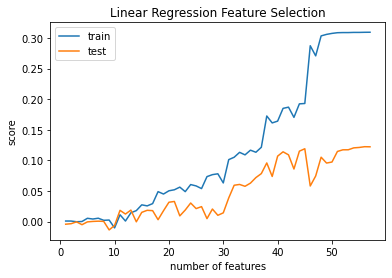

In [22]:
from sklearn.feature_selection import RFE

train_scores = []
test_scores = []
X = one_hot_encoded_data.drop('G3', axis=1)
y = one_hot_encoded_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


best_linear_fit = None
best_linear_score = 0
for i in range(1, X_train.shape[1]):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    fit = rfe.fit(X_train, y_train)
    train_scores.append(fit.score(X_train, y_train))
    test_scores.append(fit.score(X_test, y_test))
    if fit.score(X_test, y_test) > best_linear_score:
        best_linear_score = fit.score(X_test, y_test)
        best_linear_fit = fit

plt.plot(range(1, X_train.shape[1]), train_scores, label='train')
plt.plot(range(1, X_train.shape[1]), test_scores, label='test')
plt.xlabel('number of features')
plt.ylabel('score')
plt.title('Linear Regression Feature Selection')
plt.legend()
plt.show()

Avg Error:  2.612767269736842


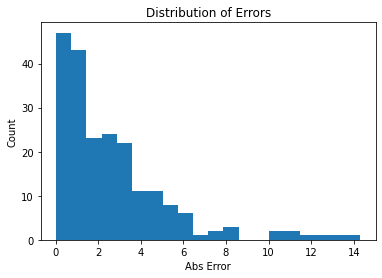

In [23]:
best_linear_fit.score(X_test, y_test)
error = np.abs(best_linear_fit.predict(X_test) - np.array(y_test))
print('Avg Error: ', np.mean(error))

# show distribution of errors
plt.hist(error, bins=20)
plt.title('Distribution of Errors')
plt.xlabel('Abs Error')
plt.ylabel('Count')
plt.show()

# Random Forest

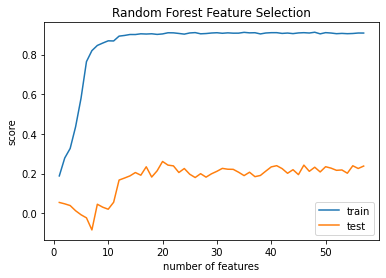

In [46]:
from sklearn.feature_selection import RFE
train_scores = []
test_scores = []
X = one_hot_encoded_data.drop('G3', axis=1)
y = one_hot_encoded_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


best_fit = None
best_score = 0
for i in range(1, X_train.shape[1]):
    rfe = RFE(estimator=RandomForestRegressor(n_estimators=61, criterion='squared_error', n_jobs=-1), n_features_to_select=i)
    fit = rfe.fit(X_train, y_train)
    train_scores.append(fit.score(X_train, y_train))
    test_scores.append(fit.score(X_test, y_test))
    if fit.score(X_test, y_test) > best_score:
        best_score = fit.score(X_test, y_test)
        best_fit = fit

plt.plot(range(1, X_train.shape[1]), train_scores, label='train')
plt.plot(range(1, X_train.shape[1]), test_scores, label='test')
plt.xlabel('number of features')
plt.ylabel('score')
plt.title('Random Forest Feature Selection')
plt.legend()
plt.show()


In [53]:
# find best number of estimators
train_scores = []
test_scores = []
X = best_fit.transform(one_hot_encoded_data.drop('G3', axis=1))
y = one_hot_encoded_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rnd_for_model = None
best_rnd_for_score = 0
for i in range(1, 100):
    rf = RandomForestRegressor(n_estimators=i, criterion='squared_error', n_jobs=-1)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    if rf.score(X_test, y_test) > best_rnd_for_score:
        best_rnd_for_score = rf.score(X_test, y_test)
        best_rnd_for_model = rf


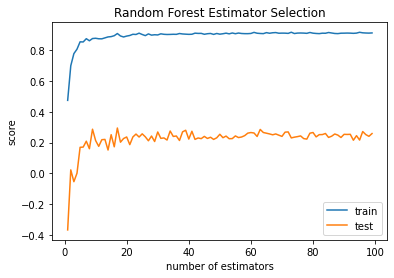

16 0.29419843633604115


In [54]:
plt.plot(range(1, 100), train_scores, label='train')
plt.plot(range(1, 100), test_scores, label='test')
plt.xlabel('number of estimators')
plt.ylabel('score')
plt.title('Random Forest Estimator Selection')
plt.legend()
plt.show()

print(test_scores.index(max(test_scores)), best_rnd_for_score)

16 0.29419843633604115
accuracy with +/- 1.0 points:  0.28708133971291866
accuracy with +/- 2.0 points:  0.49760765550239233
accuracy with +/- 2.5 points:  0.6411483253588517
accuracy with +/- 3.0 points:  0.7129186602870813
Mean Error Per Student:  2.4407542921474814


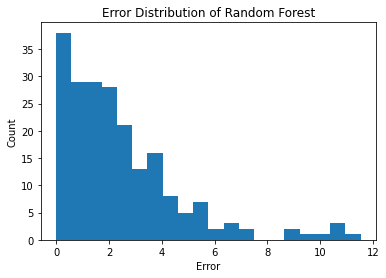

In [55]:
max_index = test_scores.index(max(test_scores))
print(max_index, test_scores[max_index])

# make the scoring more lax (+/- 1)
prediction = np.array(best_rnd_for_model.predict(X_test))
delta_error = np.abs(prediction - np.array(y_test))

print("accuracy with +/- 1.0 points: ", len(delta_error[delta_error<1]) / len(y_test))
print("accuracy with +/- 2.0 points: ", len(delta_error[delta_error<2]) / len(y_test))
print("accuracy with +/- 2.5 points: ", len(delta_error[delta_error<2.5]) / len(y_test))
print("accuracy with +/- 3.0 points: ", len(delta_error[delta_error<3]) / len(y_test))

print('Mean Error Per Student: ', np.mean(delta_error))

# show distribution of errors
plt.hist(delta_error, bins=20)
plt.title('Error Distribution of Random Forest')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

# Naive Bayes

In [56]:
# select features for naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

X = best_fit.transform(one_hot_encoded_data.drop('G3', axis=1))
y = one_hot_encoded_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('gaussian NB:', gnb.score(X_test, y_test))

cnb = CategoricalNB()
cnb.fit(X_train, y_train)
print('categorical NB:', cnb.score(X_test, y_test))

gaussian NB: 0.03349282296650718
categorical NB: 0.09569377990430622


# Attemping Multidimensional Scaling

In [57]:
#MDS
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


X = one_hot_encoded_data.drop('G3', axis=1)
Y = one_hot_encoded_data['G3']
print(Y.min(), Y.max())

0 20


In [58]:
dist_euc = squareform(pdist(X, metric='euclidean'))
dist_cor = squareform(pdist(X, metric='correlation'))
dist_cos = squareform(pdist(X, metric='cosine'))

In [59]:
model_euc = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1)
model_cor = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1)
model_cos = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1)

out_euc = model_euc.fit_transform(dist_euc)
out_cor = model_cor.fit_transform(dist_cor)
out_cos = model_cos.fit_transform(dist_cos)

In [60]:
s = 5
bins = [Y.min(), Y.quantile(0.33), Y.quantile(0.66), Y.max()]
print(bins)


[0, 10.0, 13.0, 20]


[0, 10.0, 13.0, 20]


Text(0.5, 1.0, 'Euclidean high')

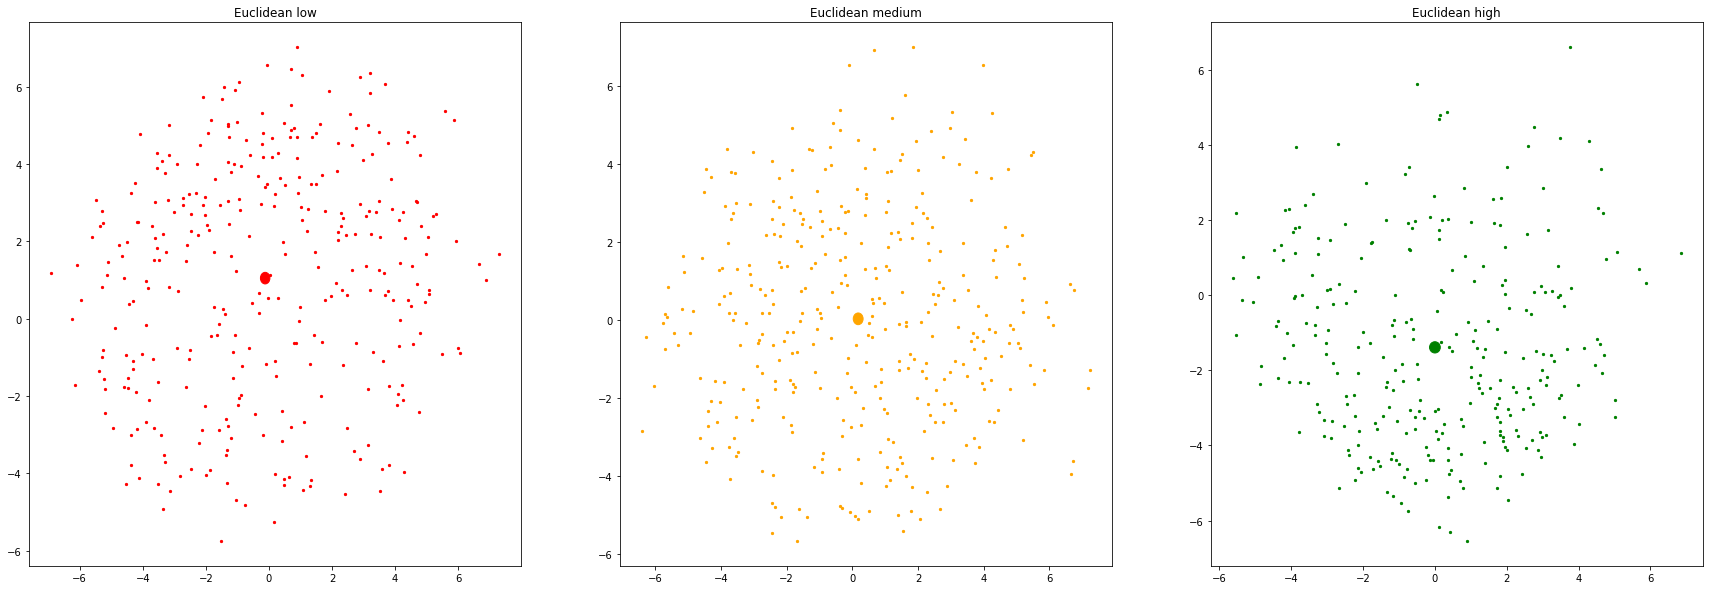

In [61]:
# euclidian, split by strata
euclidian_points = pd.DataFrame(out_euc, columns=['x', 'y'])
euclidian_points['G3'] = np.array(Y)
print(bins)
euclidian_points['strata'] = pd.cut(euclidian_points['G3'], bins=bins, labels=['low', 'medium', 'high'])

plt.figure(figsize=(30,10))
ax = plt.subplot(1,3,1)
ax.add_artist(plt.Circle((np.mean(euclidian_points[euclidian_points['strata'] == 'low']['x']), np.mean(euclidian_points[euclidian_points['strata'] == 'low']['y'])), .15, color='r'))
plt.scatter(euclidian_points[euclidian_points['strata'] == 'low']['x'], euclidian_points[euclidian_points['strata'] == 'low']['y'], c='red', s=s)
plt.title('Euclidean low')
ax = plt.subplot(1,3,2)
ax.add_artist(plt.Circle((np.mean(euclidian_points[euclidian_points['strata'] == 'medium']['x']), np.mean(euclidian_points[euclidian_points['strata'] == 'medium']['y'])), .15, color='orange'))
plt.scatter(euclidian_points[euclidian_points['strata'] == 'medium']['x'], euclidian_points[euclidian_points['strata'] == 'medium']['y'], c='orange', s=s)
plt.title('Euclidean medium')
ax = plt.subplot(1,3,3)
ax.add_artist(plt.Circle((np.mean(euclidian_points[euclidian_points['strata'] == 'high']['x']), np.mean(euclidian_points[euclidian_points['strata'] == 'high']['y'])), .15, color='g'))
plt.scatter(euclidian_points[euclidian_points['strata'] == 'high']['x'], euclidian_points[euclidian_points['strata'] == 'high']['y'], c='green', s=s)
plt.title('Euclidean high')



Text(0.5, 1.0, 'Correlation high')

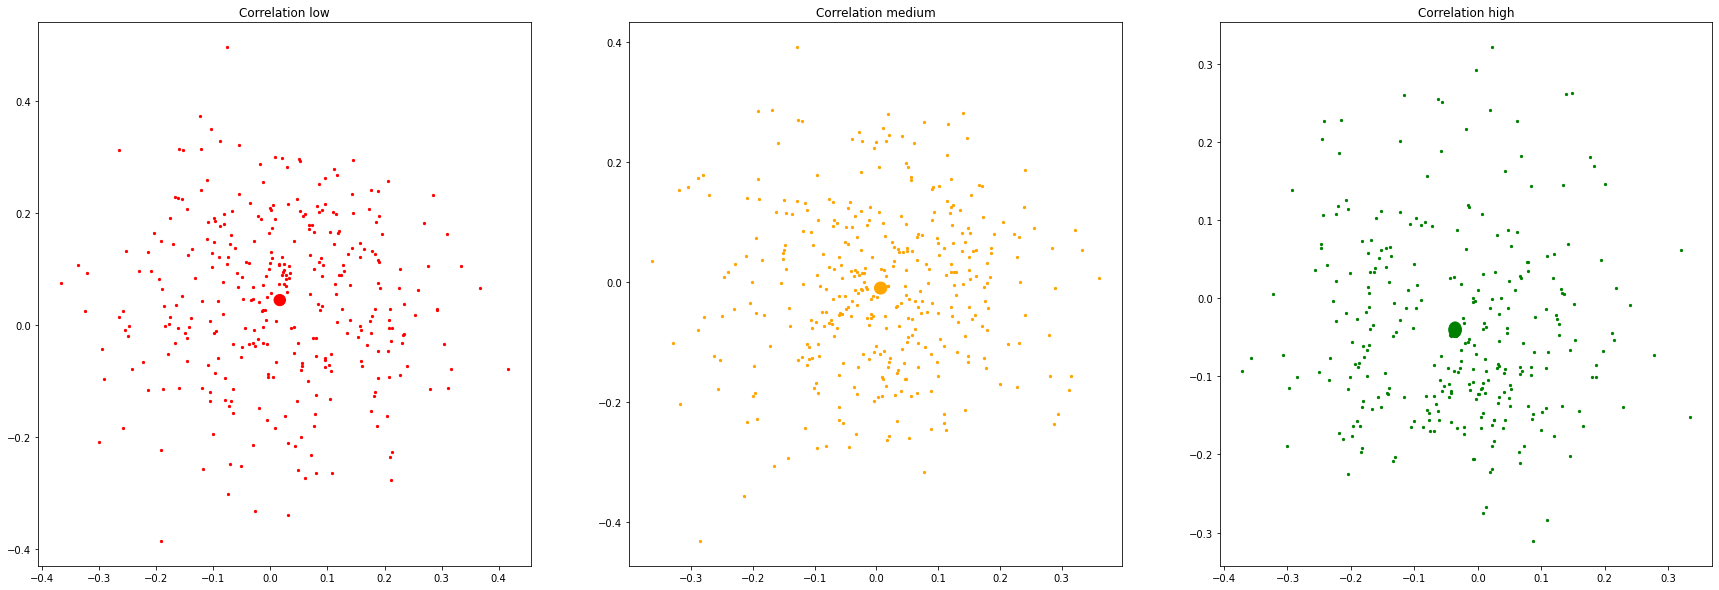

In [62]:
# correlation, split by strata
correlation_points = pd.DataFrame(out_cor, columns=['x', 'y'])
correlation_points['G3'] = np.array(Y)
correlation_points['strata'] = pd.cut(correlation_points['G3'], bins=bins, labels=['low', 'medium', 'high'])

plt.figure(figsize=(30,10))
ax = plt.subplot(1,3,1)
ax.add_artist(plt.Circle((np.mean(correlation_points[correlation_points['strata'] == 'low']['x']), np.mean(correlation_points[correlation_points['strata'] == 'low']['y'])), .01, color='r', fill=True, alpha=1))
plt.scatter(correlation_points[correlation_points['strata'] == 'low']['x'], correlation_points[correlation_points['strata'] == 'low']['y'], c='red', s=s)
plt.title('Correlation low')
ax = plt.subplot(1,3,2)
ax.add_artist(plt.Circle((np.mean(correlation_points[correlation_points['strata'] == 'medium']['x']), np.mean(correlation_points[correlation_points['strata'] == 'medium']['y'])), .01, color='orange', fill=True, alpha=1))
plt.scatter(correlation_points[correlation_points['strata'] == 'medium']['x'], correlation_points[correlation_points['strata'] == 'medium']['y'], c='orange', s=s)
plt.title('Correlation medium')
ax = plt.subplot(1,3,3)
ax.add_artist(plt.Circle((np.mean(correlation_points[correlation_points['strata'] == 'high']['x']), np.mean(correlation_points[correlation_points['strata'] == 'high']['y'])), .01, color='g', fill=True, alpha=1))
plt.scatter(correlation_points[correlation_points['strata'] == 'high']['x'], correlation_points[correlation_points['strata'] == 'high']['y'], c='green', s=s)
plt.title('Correlation high')

Text(0.5, 1.0, 'Cosine high')

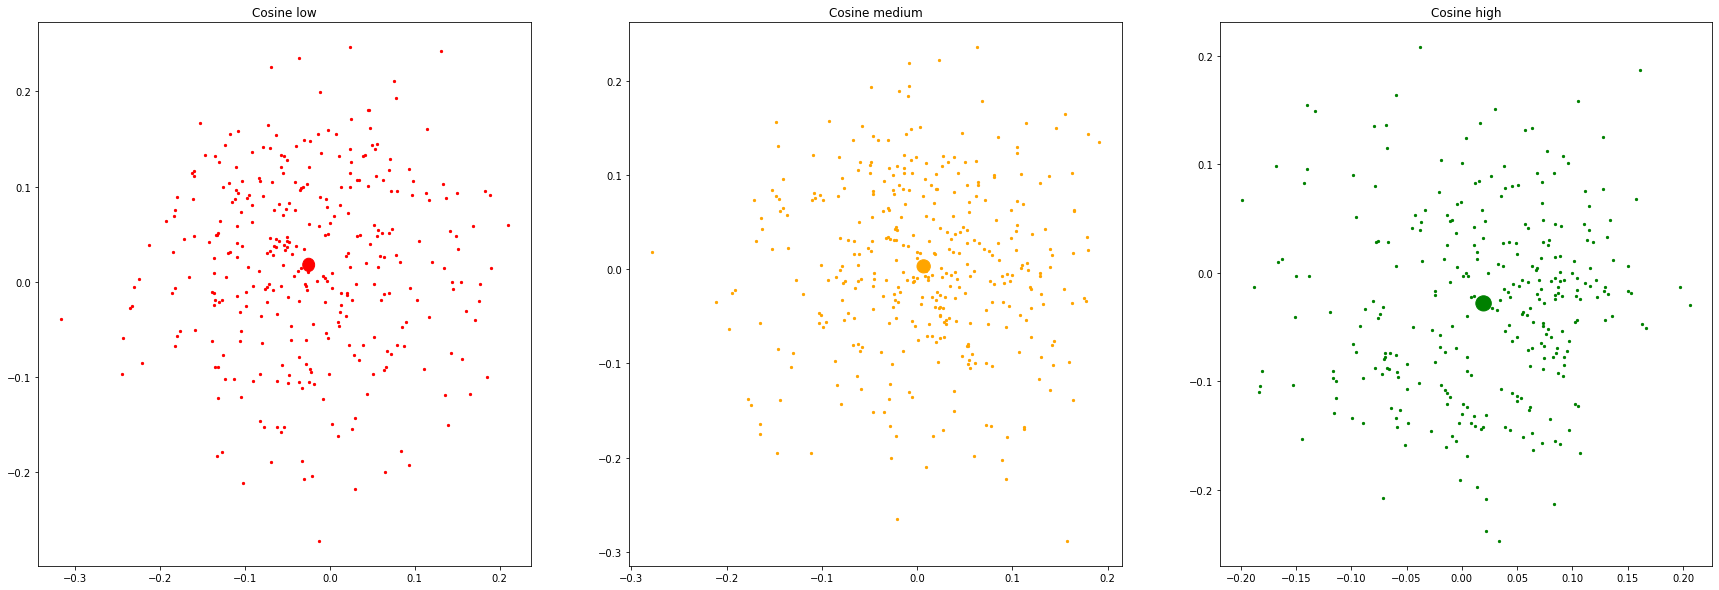

In [63]:
# cosine, split by strata
cosine_points = pd.DataFrame(out_cos, columns=['x', 'y'])
cosine_points['G3'] = np.array(Y)
cosine_points['strata'] = pd.cut(cosine_points['G3'], bins=bins, labels=['low', 'medium', 'high'])

plt.figure(figsize=(30,10))
ax = plt.subplot(1,3,1)
ax.add_artist(plt.Circle((np.mean(cosine_points[cosine_points['strata'] == 'low']['x']), np.mean(cosine_points[cosine_points['strata'] == 'low']['y'])), .007, color='r', fill=True, alpha=1))
plt.scatter(cosine_points[cosine_points['strata'] == 'low']['x'], cosine_points[cosine_points['strata'] == 'low']['y'], c='red', s=s)
plt.title('Cosine low')
ax = plt.subplot(1,3,2)
ax.add_artist(plt.Circle((np.mean(cosine_points[cosine_points['strata'] == 'medium']['x']), np.mean(cosine_points[cosine_points['strata'] == 'medium']['y'])), .007, color='orange', fill=True, alpha=1))
plt.scatter(cosine_points[cosine_points['strata'] == 'medium']['x'], cosine_points[cosine_points['strata'] == 'medium']['y'], c='orange', s=s)
plt.title('Cosine medium')
ax = plt.subplot(1,3,3)
ax.add_artist(plt.Circle((np.mean(cosine_points[cosine_points['strata'] == 'high']['x']), np.mean(cosine_points[cosine_points['strata'] == 'high']['y'])), .007, color='g', fill=True, alpha=1))
plt.scatter(cosine_points[cosine_points['strata'] == 'high']['x'], cosine_points[cosine_points['strata'] == 'high']['y'], c='green', s=s)
plt.title('Cosine high')


In [64]:
# 3d plot of correlation
model_cor_3d = MDS(n_components=3, dissimilarity='precomputed', n_jobs=-1)
out_cor_3d = model_cor_3d.fit_transform(dist_cor)


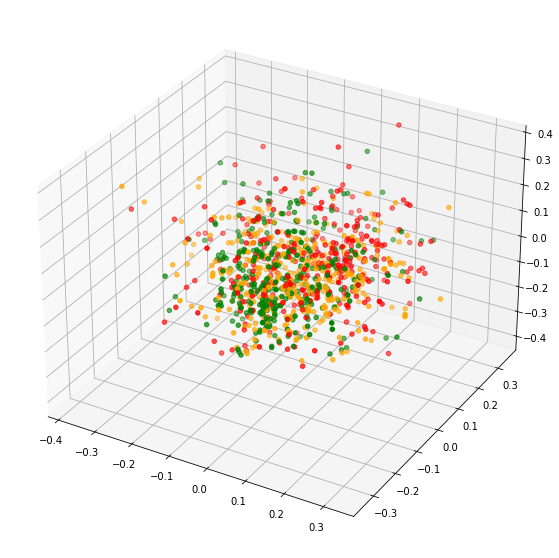

In [65]:
color = ['red' if i == 'low' else 'orange' if i == 'medium' else 'green' for i in correlation_points['strata']]
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(out_cor_3d[:,0], out_cor_3d[:,1], out_cor_3d[:,2], c=color, marker='o')

